In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 6

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 6)                 66        
                                                                 
Total params: 1136 (4.44 KB)
Trainable params: 1136 (4.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/26 [>.............................] - ETA: 12s - loss: 1.9508 - accuracy: 0.1094
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
26/26 [==============================] - 1s 10ms/step - loss: 1.8741 - accuracy: 0.1351 - val_loss: 1.7254 - val_accuracy: 0.3131
Epoch 2/1000
 1/26 [>.............................] - ETA: 0s - loss: 1.7742 - accuracy: 0.1875
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
26/26 [==============================] - 0s 3ms/step - loss: 1.6986 - accuracy: 0.2842 - val_loss: 1.5846 - val_accuracy: 0.3766
Epoch 3/1000
 1/26 [>.............................] - ETA: 0s - loss: 1.6183 - accuracy: 0.3516
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
26/26 [==============================] - 0s 3ms/step - loss: 1.5671 - accuracy: 0.3631 - val_loss: 1.4529 - val_accuracy: 0.3950


D:\anaconda\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 4/1000
 1/26 [>.............................] - ETA: 0s - loss: 1.4707 - accuracy: 0.3750
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
26/26 [==============================] - 0s 3ms/step - loss: 1.4594 - accuracy: 0.4104 - val_loss: 1.3416 - val_accuracy: 0.4319
Epoch 5/1000
 1/26 [>.............................] - ETA: 0s - loss: 1.3663 - accuracy: 0.4375
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
26/26 [==============================] - 0s 3ms/step - loss: 1.3806 - accuracy: 0.4174 - val_loss: 1.2608 - val_accuracy: 0.4816
Epoch 6/1000
 1/26 [>.............................] - ETA: 0s - loss: 1.3371 - accuracy: 0.4297
Epoch 6: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
26/26 [==============================] - 0s 3ms/step - loss: 1.3375 - accuracy: 0.4362 - val_loss: 1.2033 - val_accuracy: 0.5331
Epoch 7/1000
 1/26 [>.............................] - ETA: 0s - loss: 1.4202 - accuracy: 0.3906
E

 1/26 [>.............................] - ETA: 0s - loss: 0.8718 - accuracy: 0.6484
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
26/26 [==============================] - 0s 3ms/step - loss: 0.7906 - accuracy: 0.6713 - val_loss: 0.5086 - val_accuracy: 0.8564
Epoch 32/1000
 1/26 [>.............................] - ETA: 0s - loss: 0.7575 - accuracy: 0.6719
Epoch 32: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
26/26 [==============================] - 0s 3ms/step - loss: 0.7905 - accuracy: 0.6639 - val_loss: 0.4994 - val_accuracy: 0.8628
Epoch 33/1000
 1/26 [>.............................] - ETA: 0s - loss: 0.8586 - accuracy: 0.6328
Epoch 33: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
26/26 [==============================] - 0s 3ms/step - loss: 0.7787 - accuracy: 0.6703 - val_loss: 0.4954 - val_accuracy: 0.8536
Epoch 34/1000
 1/26 [>.............................] - ETA: 0s - loss: 0.8289 - accuracy: 0.6406
Epoch 34

 1/26 [>.............................] - ETA: 0s - loss: 0.6670 - accuracy: 0.7812
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
26/26 [==============================] - 0s 3ms/step - loss: 0.6579 - accuracy: 0.7265 - val_loss: 0.3556 - val_accuracy: 0.8987
Epoch 59/1000
 1/26 [>.............................] - ETA: 0s - loss: 0.6364 - accuracy: 0.7422
Epoch 59: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
26/26 [==============================] - 0s 3ms/step - loss: 0.6455 - accuracy: 0.7342 - val_loss: 0.3529 - val_accuracy: 0.8969
Epoch 60/1000
 1/26 [>.............................] - ETA: 0s - loss: 0.6033 - accuracy: 0.7344
Epoch 60: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
26/26 [==============================] - 0s 3ms/step - loss: 0.6502 - accuracy: 0.7305 - val_loss: 0.3470 - val_accuracy: 0.9061
Epoch 61/1000
 1/26 [>.............................] - ETA: 0s - loss: 0.6084 - accuracy: 0.7344
Epoch 61

 1/26 [>.............................] - ETA: 0s - loss: 0.6540 - accuracy: 0.7266
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
26/26 [==============================] - 0s 3ms/step - loss: 0.6074 - accuracy: 0.7397 - val_loss: 0.2954 - val_accuracy: 0.9273
Epoch 86/1000
 1/26 [>.............................] - ETA: 0s - loss: 0.5038 - accuracy: 0.7734
Epoch 86: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
26/26 [==============================] - 0s 3ms/step - loss: 0.5951 - accuracy: 0.7498 - val_loss: 0.2924 - val_accuracy: 0.9291
Epoch 87/1000
 1/26 [>.............................] - ETA: 0s - loss: 0.6315 - accuracy: 0.7266
Epoch 87: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
26/26 [==============================] - 0s 3ms/step - loss: 0.6052 - accuracy: 0.7324 - val_loss: 0.2907 - val_accuracy: 0.9328
Epoch 88/1000
 1/26 [>.............................] - ETA: 0s - loss: 0.6566 - accuracy: 0.7344
Epoch 88

 1/26 [>.............................] - ETA: 0s - loss: 0.6937 - accuracy: 0.7188
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
26/26 [==============================] - 0s 3ms/step - loss: 0.5778 - accuracy: 0.7627 - val_loss: 0.2695 - val_accuracy: 0.9383
Epoch 113/1000
 1/26 [>.............................] - ETA: 0s - loss: 0.4769 - accuracy: 0.8203
Epoch 113: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
26/26 [==============================] - 0s 3ms/step - loss: 0.5779 - accuracy: 0.7597 - val_loss: 0.2773 - val_accuracy: 0.9263
Epoch 114/1000
 1/26 [>.............................] - ETA: 0s - loss: 0.5821 - accuracy: 0.7734
Epoch 114: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
26/26 [==============================] - 0s 3ms/step - loss: 0.5729 - accuracy: 0.7676 - val_loss: 0.2692 - val_accuracy: 0.9401
Epoch 115/1000
 1/26 [>.............................] - ETA: 0s - loss: 0.7194 - accuracy: 0.6875
Ep

Epoch 139/1000
 1/26 [>.............................] - ETA: 0s - loss: 0.4598 - accuracy: 0.8047
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
26/26 [==============================] - 0s 3ms/step - loss: 0.5179 - accuracy: 0.7925 - val_loss: 0.2532 - val_accuracy: 0.9365
Epoch 140/1000
 1/26 [>.............................] - ETA: 0s - loss: 0.5726 - accuracy: 0.7812
Epoch 140: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
26/26 [==============================] - 0s 3ms/step - loss: 0.5568 - accuracy: 0.7716 - val_loss: 0.2567 - val_accuracy: 0.9383
Epoch 141/1000
 1/26 [>.............................] - ETA: 0s - loss: 0.4901 - accuracy: 0.8047
Epoch 141: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
26/26 [==============================] - 0s 3ms/step - loss: 0.5505 - accuracy: 0.7704 - val_loss: 0.2547 - val_accuracy: 0.9374
Epoch 142/1000
 1/26 [>.............................] - ETA: 0s - loss: 0.4372 - accu

Epoch 166/1000
 1/26 [>.............................] - ETA: 0s - loss: 0.5099 - accuracy: 0.7891
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
26/26 [==============================] - 0s 3ms/step - loss: 0.5580 - accuracy: 0.7729 - val_loss: 0.2490 - val_accuracy: 0.9365
Epoch 167/1000
 1/26 [>.............................] - ETA: 0s - loss: 0.5065 - accuracy: 0.8203
Epoch 167: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
26/26 [==============================] - 0s 3ms/step - loss: 0.5449 - accuracy: 0.7815 - val_loss: 0.2522 - val_accuracy: 0.9457
Epoch 168/1000
 1/26 [>.............................] - ETA: 0s - loss: 0.5009 - accuracy: 0.7734
Epoch 168: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
26/26 [==============================] - 0s 3ms/step - loss: 0.5358 - accuracy: 0.7867 - val_loss: 0.2551 - val_accuracy: 0.9374
Epoch 169/1000
 1/26 [>.............................] - ETA: 0s - loss: 0.6045 - accu

Epoch 193/1000
 1/26 [>.............................] - ETA: 0s - loss: 0.5445 - accuracy: 0.7891
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
26/26 [==============================] - 0s 3ms/step - loss: 0.5373 - accuracy: 0.7827 - val_loss: 0.2549 - val_accuracy: 0.9401
Epoch 194/1000
 1/26 [>.............................] - ETA: 0s - loss: 0.5328 - accuracy: 0.7500
Epoch 194: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
26/26 [==============================] - 0s 3ms/step - loss: 0.5244 - accuracy: 0.7851 - val_loss: 0.2536 - val_accuracy: 0.9346
Epoch 195/1000
 1/26 [>.............................] - ETA: 0s - loss: 0.5103 - accuracy: 0.8125
Epoch 195: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
26/26 [==============================] - 0s 3ms/step - loss: 0.5263 - accuracy: 0.7913 - val_loss: 0.2562 - val_accuracy: 0.9383
Epoch 196/1000
 1/26 [>.............................] - ETA: 0s - loss: 0.5051 - accu

Epoch 220/1000
 1/26 [>.............................] - ETA: 0s - loss: 0.3915 - accuracy: 0.8125
Epoch 220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
26/26 [==============================] - 0s 3ms/step - loss: 0.5060 - accuracy: 0.7947 - val_loss: 0.2461 - val_accuracy: 0.9392
Epoch 221/1000
 1/26 [>.............................] - ETA: 0s - loss: 0.5096 - accuracy: 0.7969
Epoch 221: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
26/26 [==============================] - 0s 3ms/step - loss: 0.5183 - accuracy: 0.8033 - val_loss: 0.2503 - val_accuracy: 0.9420
Epoch 222/1000
 1/26 [>.............................] - ETA: 0s - loss: 0.4676 - accuracy: 0.8203
Epoch 222: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
26/26 [==============================] - 0s 3ms/step - loss: 0.4998 - accuracy: 0.8017 - val_loss: 0.2418 - val_accuracy: 0.9346
Epoch 223/1000
 1/26 [>.............................] - ETA: 0s - loss: 0.3946 - accu

Epoch 247/1000
 1/26 [>.............................] - ETA: 0s - loss: 0.4853 - accuracy: 0.8203
Epoch 247: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
26/26 [==============================] - 0s 3ms/step - loss: 0.4925 - accuracy: 0.8042 - val_loss: 0.2499 - val_accuracy: 0.9291
Epoch 247: early stopping


In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

9/9 [==============================] - 0s 981us/step - loss: 0.2499 - accuracy: 0.9291


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 71ms/step
[2.2139594e-02 9.5782727e-01 5.1671490e-05 1.9175438e-02 7.9747749e-04
 8.5531310e-06]
1


# Confusion matrix

34/34 [==============================] - 0s 676us/step


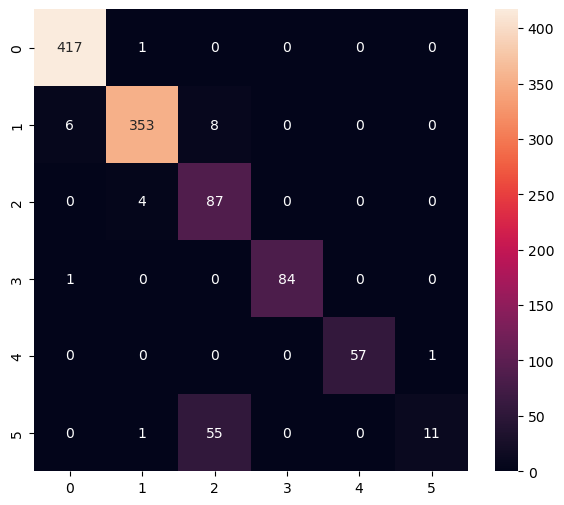

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       418
           1       0.98      0.96      0.97       367
           2       0.58      0.96      0.72        91
           3       1.00      0.99      0.99        85
           4       1.00      0.98      0.99        58
           5       0.92      0.16      0.28        67

    accuracy                           0.93      1086
   macro avg       0.91      0.84      0.82      1086
weighted avg       0.95      0.93      0.92      1086



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

D:\anaconda\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\harsh\AppData\Local\Temp\tmpnfkg294j\assets


INFO:tensorflow:Assets written to: C:\Users\harsh\AppData\Local\Temp\tmpnfkg294j\assets


6632

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 6.92 ms


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.2139626e-02 9.5782715e-01 5.1671581e-05 1.9175483e-02 7.9747813e-04
 8.5531456e-06]
1
